<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:
import numpy as np
import tensorflow as tf

data = np.load('../quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [2]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

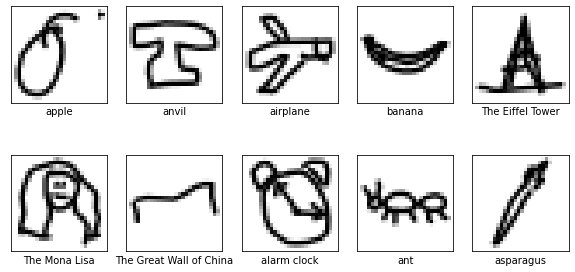

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [4]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [5]:
X.shape

(100000, 784)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    optimizer='adam',
    learning_rate=.01,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

TypeError: Invalid keyword argument(s) in `compile`: {'learning_rate'}

In [78]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

In [79]:
results = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val)
)

Epoch 1/20
2500/2500 [==============================] - 5s 2ms/step - loss: 2.1784 - accuracy: 0.5734 - val_loss: 1.0601 - val_accuracy: 0.6657
Epoch 2/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9831 - accuracy: 0.7127 - val_loss: 0.9582 - val_accuracy: 0.7185
Epoch 3/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.8844 - accuracy: 0.7427 - val_loss: 0.8383 - val_accuracy: 0.7579
Epoch 4/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8036 - accuracy: 0.7626 - val_loss: 0.8082 - val_accuracy: 0.7664
Epoch 5/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.7525 - accuracy: 0.7740 - val_loss: 0.7497 - val_accuracy: 0.7726
Epoch 6/20
2500/2500 [==============================] - 4s 1ms/step - loss: 0.7154 - accuracy: 0.7840 - val_loss: 0.7478 - val_accuracy: 0.7807
Epoch 7/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6921 - accuracy: 0.7915 - val_loss: 0.7124 - val_accuracy:

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [61]:
results.history

{'loss': [2.0743935108184814,
  0.9898481369018555,
  0.8894384503364563,
  0.8069661855697632,
  0.7526567578315735,
  0.7120815515518188,
  0.6836683750152588,
  0.6623412370681763,
  0.6469472646713257,
  0.6335339546203613],
 'accuracy': [0.5983750224113464,
  0.7162125110626221,
  0.7447624802589417,
  0.7637249827384949,
  0.7771124839782715,
  0.788812518119812,
  0.7952374815940857,
  0.801925003528595,
  0.8054500222206116,
  0.811287522315979],
 'val_loss': [1.0332937240600586,
  0.9336109161376953,
  0.9614762663841248,
  0.7803643345832825,
  0.7504361867904663,
  0.7402146458625793,
  0.6937193870544434,
  0.6786972880363464,
  0.678119957447052,
  0.6773274540901184],
 'val_accuracy': [0.6955500245094299,
  0.7290499806404114,
  0.7257500290870667,
  0.7705000042915344,
  0.7788000106811523,
  0.7870500087738037,
  0.7964500188827515,
  0.7985000014305115,
  0.800000011920929,
  0.8021500110626221]}

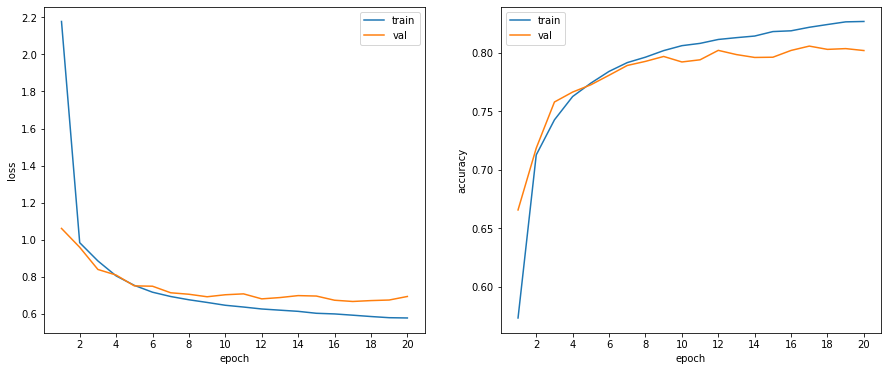

In [82]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(results.history)
df['epoch'] = [i+1 for i in range(df.shape[0])]

fig, axs = plt.subplots(figsize=[15,6], ncols=2)

sns.lineplot(x='epoch', y='loss', data=df, label='train', ax=axs[0])
sns.lineplot(x='epoch', y='val_loss', data=df, label='val', ax=axs[0])
axs[0].set_ylabel('loss')

sns.lineplot(x='epoch', y='accuracy', data=df, label='train', ax=axs[1])
sns.lineplot(x='epoch', y='val_accuracy', data=df, label='val', ax=axs[1])
axs[1].set_ylabel('accuracy')

for ax in axs:
    ax.set_xticks(range(2, 22, 2))
plt.show()

We could have stopped training after 12 epochs. Training further didn't hurt, but it was a waste of time.

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [84]:
# Since I already used adam, I'll try sgd now.

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
results2 = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val)
)

Epoch 1/20
2500/2500 [==============================] - 4s 1ms/step - loss: 1.2718 - accuracy: 0.6341 - val_loss: 1.1179 - val_accuracy: 0.6922
Epoch 2/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.9758 - accuracy: 0.7028 - val_loss: 1.0844 - val_accuracy: 0.6980
Epoch 3/20
2500/2500 [==============================] - 5s 2ms/step - loss: 1.2180 - accuracy: 0.6272 - val_loss: 1.1101 - val_accuracy: 0.6880
Epoch 4/20
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9146 - accuracy: 0.7165 - val_loss: 1.0025 - val_accuracy: 0.7028
Epoch 5/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.9816 - accuracy: 0.6980 - val_loss: 1.0573 - val_accuracy: 0.6967
Epoch 6/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.9196 - accuracy: 0.7110 - val_loss: 1.0560 - val_accuracy: 0.6895
Epoch 7/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9230 - accuracy: 0.7103 - val_loss: 1.1634 - val_accuracy:

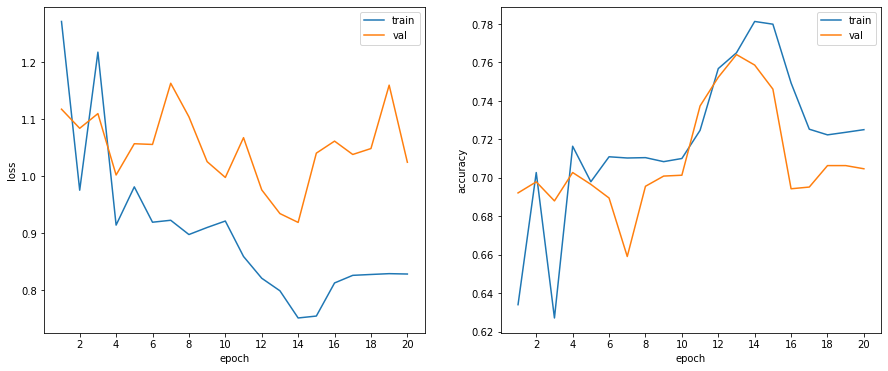

In [85]:
df = pd.DataFrame.from_records(results2.history)
df['epoch'] = [i+1 for i in range(df.shape[0])]

fig, axs = plt.subplots(figsize=[15,6], ncols=2)

sns.lineplot(x='epoch', y='loss', data=df, label='train', ax=axs[0])
sns.lineplot(x='epoch', y='val_loss', data=df, label='val', ax=axs[0])
axs[0].set_ylabel('loss')

sns.lineplot(x='epoch', y='accuracy', data=df, label='train', ax=axs[1])
sns.lineplot(x='epoch', y='val_accuracy', data=df, label='val', ax=axs[1])
axs[1].set_ylabel('accuracy')

for ax in axs:
    ax.set_xticks(range(2, 22, 2))
plt.show()

We got up to a half-decent accuracy, but **sgd** clearly produces much more unpredictable results in this case. **adam** was a much smoother increase.

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
+ *The task at hand is a multiclass problem, so binary_crossentropy wouldn't work, as well as a few other of the available functions. Also, several of them only work for regression. sparse_categorical_crossentropy is the clear winner here.*
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
+ *A loss function calculates loss, which is a metric, a somewhat technical one used more by the model than by the common man. The common man prefers simpler metrics like accuracy: how many did we get right?*
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 
+ *As demonstrated above, the **adam** optimizer offers a much smoother, more trustworthy increase in accuracy, at no noticeable computational cost.*

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)